#### Exemplo didático de como criar e alimentar um banco de dados a partir de uma fonte externa, realizar consultas em linguagem SQL e exportar as consultas geradas para um arquivo no computador.

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Ler e carregar base de dados
investimentos_df = pd.read_excel('Base de Investimentos.xlsx', index_col = None, header = 0, decimal = '.')
display(investimentos_df) # Apresenta ao usuário

,Dias Úteis,Investimento,Rendimento,Lucro,Lucro Percentual
0,1,4995.99,4995.99,0.00,1.000000
1,2,4995.99,4916.22,-79.77,0.984033
2,3,4995.99,5093.68,97.69,1.019554
3,4,4995.99,5054.99,59.00,1.011809
4,5,4995.99,5132.98,136.99,1.027420
...,...,...,...,...,...
333,334,3999.39,4608.85,609.46,1.152388
334,335,3999.39,4722.45,723.06,1.180793
335,336,3999.39,4418.11,418.72,1.104696
336,337,3999.39,4624.83,625.44,1.156384


<IPython.core.display.Javascript object>


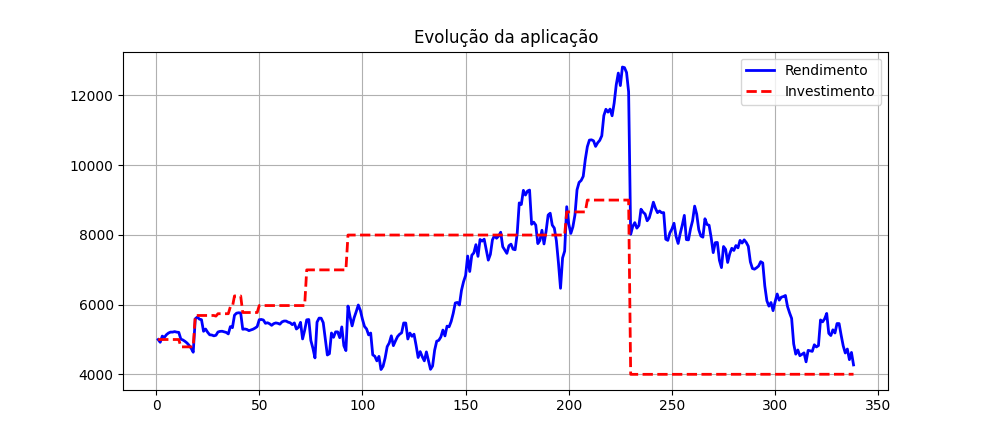

In [67]:
# plt.bar(investimentos_df['Dias Úteis'], investimentos_df['Rendimento'])

# plt.plot('Dias Úteis', 'Rendimento', data = investimentos_df)

# plt.plot(investimentos_df['Dias Úteis'], investimentos_df['Rendimento'],
#         color = 'blue', marker = 'o', linestyle = 'solid', linewidth = 2, markersize = 1)

# plt.plot(investimentos_df['Dias Úteis'], investimentos_df['Investimento'],
#         color = 'red', marker = 'o', linestyle = 'dashed', linewidth = 2, markersize = 1)

plt.plot(investimentos_df['Dias Úteis'], investimentos_df['Rendimento'],
         color = 'blue', linestyle = 'solid', label = 'Rendimento', linewidth = 2)

plt.plot(investimentos_df['Dias Úteis'], investimentos_df['Investimento'],
         color = 'red', linestyle = 'dashed', label = 'Investimento', linewidth = 2)

plt.grid()
plt.legend()
plt.title('Evolução da aplicação')
plt.show()

In [4]:
# Gerar listas a partir de cada coluna do dataframe contendo todos seus registros
dias = investimentos_df['Dias Úteis'].to_list()
investimento = investimentos_df['Investimento'].to_list()
rendimento = investimentos_df['Rendimento'].to_list()
lucro = investimentos_df['Lucro'].to_list()
lucro_percentual = investimentos_df['Lucro Percentual'].to_list()

In [68]:
# Remover o arquivo com o banco de dados SQLite (caso exista)
os.remove("investimentos.db") if os.path.exists("investimentos.db") else None

In [2]:
# Criar a conexão com o banco de dados 
# Se o banco de dados não existir, ele é criado neste momento
connection = sqlite3.connect('investimentos.db')

In [3]:
# Criar o cursor (o cursor permite percorrer todos os registros em um conjunto de dados)
cursor = connection.cursor()

In [71]:
# Função para criar uma tabela
def create_table():
    cursor.execute('CREATE TABLE IF NOT EXISTS investimentos (id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, '
                   'investimento REAL, rendimento REAL, lucro REAL, lucro_percentual REAL)')

In [72]:
create_table() # Criar tabela

In [87]:
# Função para inserir dados na tabela  
def insert_data(investimento, rendimento, lucro, lucro_percentual):
    cursor.execute('INSERT INTO investimentos (investimento, rendimento, lucro, lucro_percentual) VALUES (?, ?, ?, ?)', 
              (investimento, rendimento, lucro, lucro_percentual))
    connection.commit()

In [74]:
# Inserir um conjunto de dados
for k, registro in enumerate(dias):
    n1 = round(investimento[k], ndigits = 2)
    n2 = round(rendimento[k], ndigits = 2)
    n3 = round(lucro[k], ndigits = 2)
    n4 = round(lucro_percentual[k], ndigits = 6)
    insert_data(n1, n2, n3, n4)

print('Registros inseridos na base de dados com sucesso.')

Registros inseridos na base de dados com sucesso.


In [5]:
# Ler toda a base de dados
def read_data():
    cursor.execute('SELECT * FROM investimentos')
    for registro in cursor.fetchall():
        print(registro)

In [ ]:
read_data() # Ler toda a base de dados (todas as colunas e registros)

In [90]:
last = len(dias)-1 # Último registro da base de dados em Excel
n1 = round(investimento[last], ndigits = 2)
n2 = round(rendimento[last], ndigits = 2)
n3 = round(lucro[last], ndigits = 2)
n4 = round(lucro_percentual[last], ndigits = 6)
insert_data(n1, n2, n3, n4)

print('Registros inseridos na base de dados com sucesso.')

Registros inseridos na base de dados com sucesso.


In [22]:
cursor.execute(f'SELECT * FROM investimentos WHERE id = {len(dias)}')
for registro in cursor.fetchall():
    print(registro)

(338, 3999.39, 4266.9, 267.51, 1.066888)


In [7]:
a, b, c, d, e = [], [], [], [], [] # Iniciar listas vazias

cursor.execute('SELECT * FROM investimentos') # Realizar consulta
query = cursor.fetchall() # Resultado da consulta ao banco de dados

for k, item in enumerate(query): # Laço para preencher as listas com os registros adequados
    a.append(query[k][0])
    b.append(query[k][1])
    c.append(query[k][2])
    d.append(query[k][3])
    e.append(query[k][4])
    
# Criar dataframe contendo os registros retornados pela consulta
# df1 = pd.DataFrame(list(zip(a, b, c, d, e)),
#                   columns = ['Dias Úteis', 'Investimento', 'Rendimento', 'Lucro', 'Lucro Percentual'])

df2 = pd.DataFrame({'Dias Úteis': a, 'Investimento': b, 'Rendimento': c, 'Lucro': d, 'Lucro Percentual': e})

display(df2) # Apresentar o dataframe ao usuário

,Dias Úteis,Investimento,Rendimento,Lucro,Lucro Percentual
0,1,4995.99,4995.99,0.00,1.000000
1,2,4995.99,4916.22,-79.77,0.984033
2,3,4995.99,5093.68,97.69,1.019554
3,4,4995.99,5054.99,59.00,1.011809
4,5,4995.99,5132.98,136.99,1.027420
...,...,...,...,...,...
333,334,3999.39,4608.85,609.46,1.152388
334,335,3999.39,4722.45,723.06,1.180793
335,336,3999.39,4418.11,418.72,1.104696
336,337,3999.39,4624.83,625.44,1.156384


In [13]:
# Salvar dataframe contendo os registros da consulta ao banco de dados como arquivo excel no computador
df2.to_excel('Investimentos Consulta.xlsx', header = True, index = False, sheet_name = 'Dados', columns = None)

In [68]:
# Encerrar a conexão com o banco de dados
cursor.close()
connection.close()